In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import style

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_data = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==6).all()

In [5]:
#  3. Convert the June temperatures to a list.
junetemps = list((june_data))

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(junetemps,columns=['date','June Temps'])
june_df.set_index(june_df['date'], inplace=True)

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
june_df

,date,June Temps
date,,
2010-06-01,2010-06-01,78.0
2010-06-02,2010-06-02,76.0
2010-06-03,2010-06-03,78.0
2010-06-04,2010-06-04,76.0
2010-06-05,2010-06-05,77.0
...,...,...
2017-06-26,2017-06-26,79.0
2017-06-27,2017-06-27,74.0
2017-06-28,2017-06-28,74.0


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_data = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==12).all()

In [10]:
# 7. Convert the December temperatures to a list.
dectemps = list((december_data))

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dectemps,columns=['date','December Temps'])
dec_df.set_index(dec_df['date'], inplace=True)

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Additional Statistics

In [13]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of June.
results_june_prcp =[]
results_june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()

# Create a DataFrame from the list of percipitation for the month of June.
june_prcp_df = pd.DataFrame(results_june_prcp, columns = ['date', 'June Precipitation'])
june_prcp_df.set_index(june_prcp_df['date'], inplace=True)

# Calculate and print out the summary statistics for the June precipitation DataFrame.
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [14]:
june_prcp_df

,date,June Precipitation
date,,
2010-06-01,2010-06-01,0.00
2010-06-02,2010-06-02,0.01
2010-06-03,2010-06-03,0.00
2010-06-04,2010-06-04,0.00
2010-06-05,2010-06-05,0.00
...,...,...
2017-06-26,2017-06-26,0.02
2017-06-27,2017-06-27,0.10
2017-06-28,2017-06-28,0.02


In [15]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of December.
results_dec_prcp =[]
results_dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

# Create a DataFrame from the list of percipitation for the month of December.
dec_prcp_df = pd.DataFrame(results_dec_prcp, columns = ['date', 'Dec Precipitation'])
dec_prcp_df .set_index(dec_prcp_df ['date'], inplace=True)

# Calculate and print out the summary statistics for the Decemeber precipitation DataFrame.
dec_prcp_df .describe()

,Dec Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [16]:
# June Precipitation by Year from 2010 - 2017
# Set index to date
june_prcp_df_index = june_prcp_df.set_index(june_prcp_df['date'], inplace=False)

# Sort the dates
june_prcp_df_index = june_prcp_df_index.sort_index()

#Set the index date to the date datatype
june_prcp_df_index.index = pd.to_datetime(june_prcp_df_index.index)

#Group by year
june_prcp_df_index_year = june_prcp_df_index.resample("Y").mean()

In [17]:
# December Precipitation group by Year from 2010 - 2016
# Set index to date
dec_prcp_df_index = dec_prcp_df.set_index(dec_prcp_df['date'], inplace=False)

# Sort the dates
dec_prcp_df_index = dec_prcp_df_index.sort_index()

#Set the index date to the date datatype
dec_prcp_df_index.index = pd.to_datetime(dec_prcp_df_index.index)

#Group by year
dec_prcp_df_index_year = dec_prcp_df_index.resample("Y").mean()

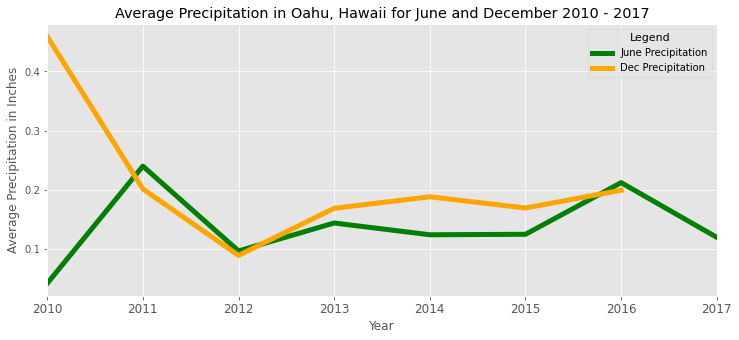

In [18]:
#June and December - Precipitation Graph by Year from 2010 - 2017
#Style
style.use('ggplot')

#Plot the Graph
ax = june_prcp_df_index_year.plot(c='green', linewidth=5)
dec_prcp_df_index_year.plot(ax=ax, c='orange', figsize=(12, 5), linewidth=5)

#Labels
ax.set_xlabel('Year')
ax.set_ylabel("Average Precipitation in Inches")
ax.set_title("Average Precipitation in Oahu, Hawaii for June and December 2010 - 2017")

#Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

#Plot the legend
lgnd = plt.legend(fontsize="10", mode="Expanded",
         loc="best", title="Legend")
lgnd.get_title().set_fontsize(11)
plt.show()